In [1]:
#Necesario para que los plots de matplotlib aparezcan en el notebook
%matplotlib inline


In [2]:
import matplotlib.pyplot as plt
import pandas as pd

carpeta_datos="G:/Mi unidad/DOCTORADO/Docencia/Curso_2018-2019/IN_2018-2019/data/"

#True si cada variable categórica se convierte en varias binarias (tantas como categorías),
#False si solo se convierte la categórica a numérica (ordinal)
binarizar = False

'''
devuelve un DataFrame, los valores perdidos notados como '?' se convierten a NaN,
si no, se consideraría '?' como una categoría más
'''

if not binarizar:
    adult_orig = pd.read_csv(carpeta_datos+'adult.csv')
else:
    adult_orig = pd.read_csv(carpeta_datos+'adult.csv',na_values="?")
    
print("------ Lista de características y tipos (object=categórica)")
print(adult_orig.dtypes,"\n")

print("------ Distribución de datos en la característica 'workclass'")
print(adult_orig['workclass'].value_counts(),"\n")

print("------ Y en la clase")
print(adult_orig['class'].value_counts(),"\n")



------ Lista de características y tipos (object=categórica)
age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
class             object
dtype: object 

------ Distribución de datos en la característica 'workclass'
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64 

------ Y en la clase
 <=50K    24720
 >50K      7841
Name: class, dtype: int64 



In [3]:
adult_orig.all

<bound method DataFrame.all of        age          workclass  fnlwgt      education  education-num  \
0       39          State-gov   77516      Bachelors             13   
1       50   Self-emp-not-inc   83311      Bachelors             13   
2       38            Private  215646        HS-grad              9   
3       53            Private  234721           11th              7   
4       28            Private  338409      Bachelors             13   
5       37            Private  284582        Masters             14   
6       49            Private  160187            9th              5   
7       52   Self-emp-not-inc  209642        HS-grad              9   
8       31            Private   45781        Masters             14   
9       42            Private  159449      Bachelors             13   
10      37            Private  280464   Some-college             10   
11      30          State-gov  141297      Bachelors             13   
12      23            Private  122272      Bac

In [4]:
adult_orig.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'class'],
      dtype='object')

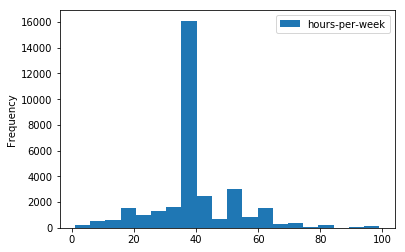

In [16]:
#Visualización del paquete pandas: https://pandas.pydata.org/pandas-docs/stable/visualization.html
#Algunos ejemplos

adult_orig.plot.hist(x='age', y='hours-per-week',bins=20)

In [ ]:
adult_orig.boxplot(showfliers=False)

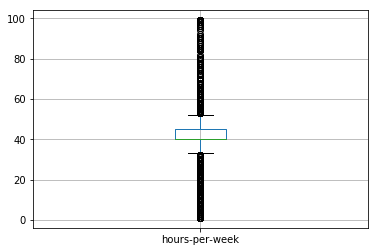

In [7]:
adult_orig.boxplot(column=['hours-per-week'])

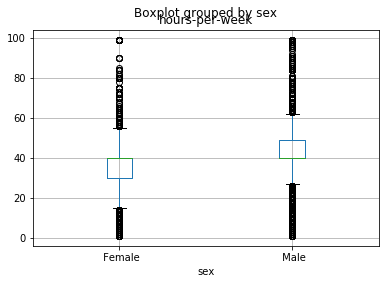

In [8]:
adult_orig.boxplot(column='hours-per-week', by='sex')

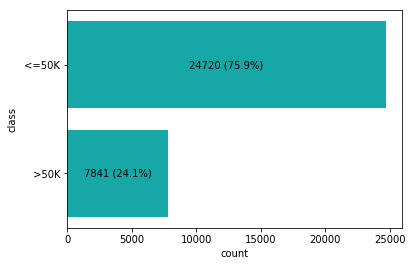

In [9]:
#'''
# gráfico de barras horizontales con la proporción de cada clase
plt.figure(1)
plt.clf()
import seaborn as sns
ax = sns.countplot(y="class", data=adult_orig, color="c");
ncount = adult_orig.shape[0]
for p in ax.patches:
    val_x=p.get_bbox().get_points()[:,0]
    val_y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.0f} ({:.1f}%)'.format(val_x[1], 100.*val_x[1]/ncount), (val_x.mean(), (val_y-0.4)), ha='center', va='center')
#'''

------ Preparando el scatter matrix...


C:\Users\elena\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 432x288 with 0 Axes>

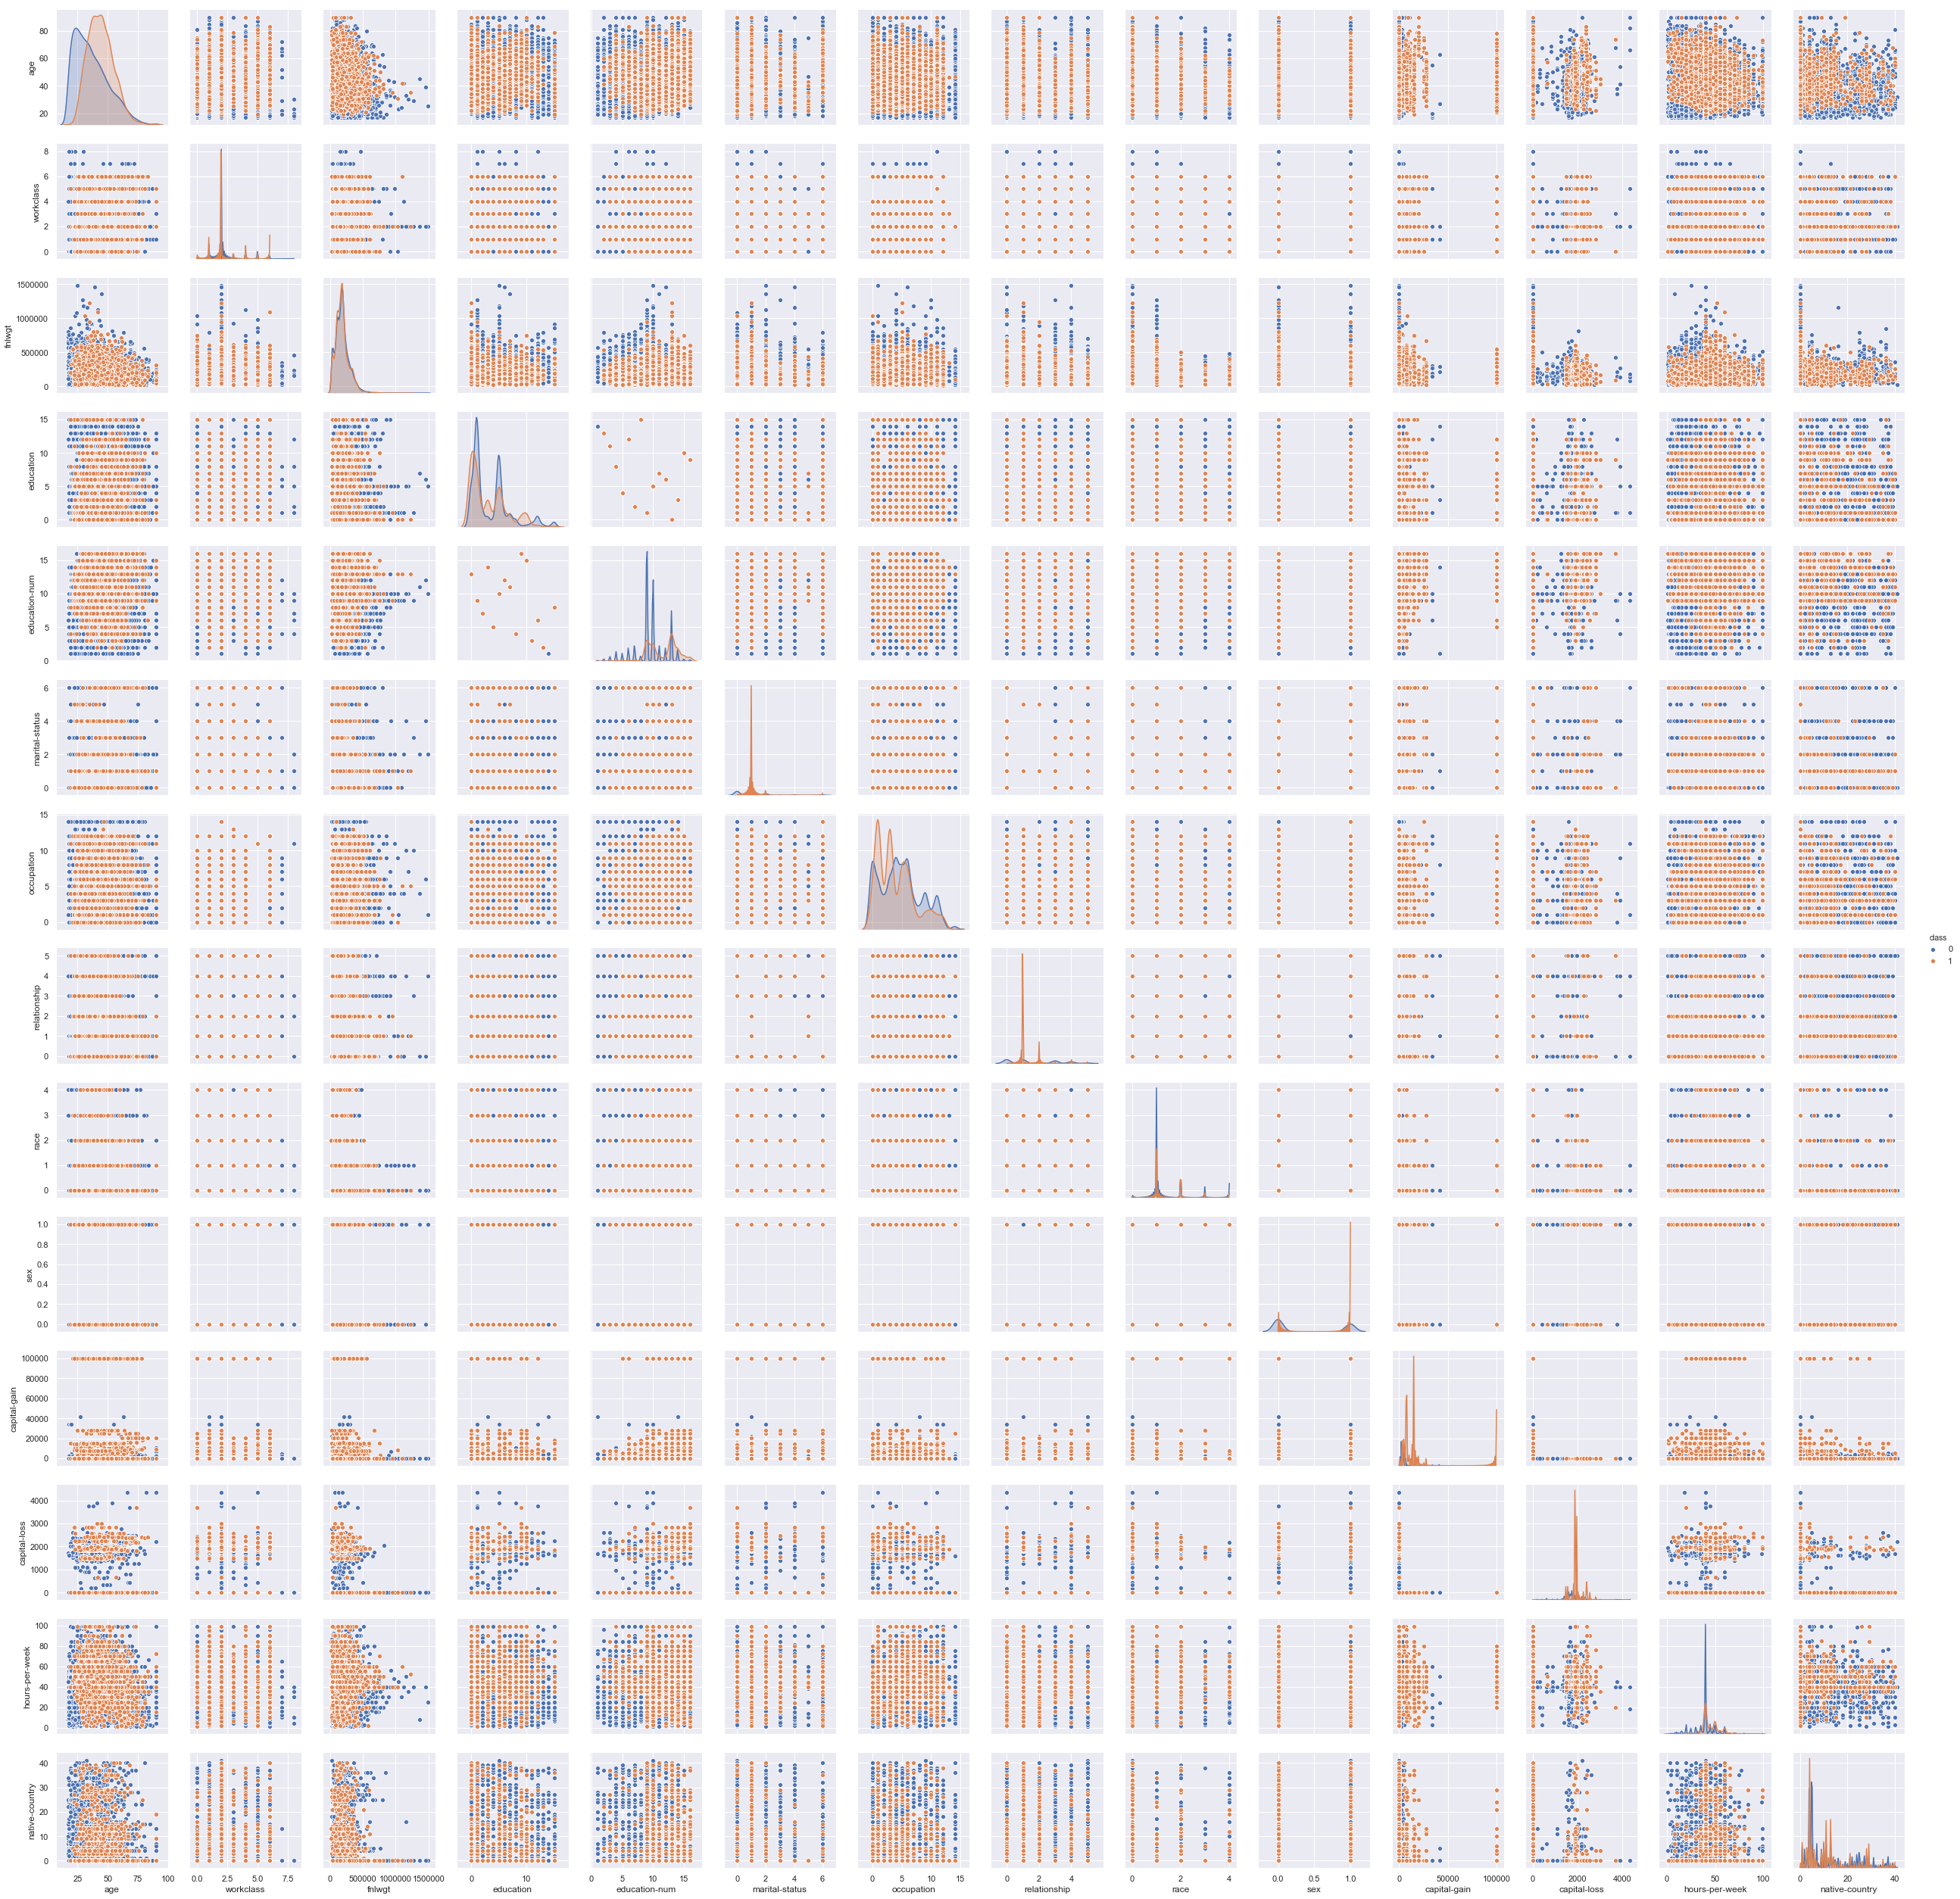

In [10]:
#'''
print("------ Preparando el scatter matrix...")
plt.figure(2)
plt.clf()
# para scatter matrix, se convierten las variables categóricas a numéricas
adult_int = adult_orig
char_cols = adult_int.dtypes.pipe(lambda x: x[x == 'object']).index #lista de columnas con var. categóticas (las de tipo 'object')
for c in char_cols:
    adult_int[c] = pd.factorize(adult_int[c])[0]
lista_vars = list(adult_int)
lista_vars.remove('class') #excluimos la columna 'class' del plot
#se genera el scatter matrix
sns.set()
sns_plot = sns.pairplot(adult_int, vars=lista_vars, hue="class", diag_kind="kde") #en hue indicamos que la columna 'class' define los colores
sns_plot.savefig("adult_scatter_plot.png")
print("")
#'''

In [11]:
'''
si el dataset contiene variables categóricas con cadenas, es necesario convertirlas a numéricas antes de usar 'fit', y para
no hacerlas ordinales, mejor convertirlas a variables binarias con get_dummies
Otras alternativas para convertir las variables categóricas es usar LabelEncoder, One-Hot-Encoding o LabelBinarizer en la matriz numpy (ver más abajo)
Para saber más: http://pbpython.com/categorical-encoding.html
'''
# devuelve una lista de las características categóricas excluyendo la columna 'class' que contiene la clase
lista_categoricas = [x for x in adult_orig.columns if (adult_orig[x].dtype == object and adult_orig[x].name != 'class')]
if not binarizar:
    adult = adult_orig
else:
    # reemplaza las cateogóricas por binarias
    adult = pd.get_dummies(adult_orig, columns=lista_categoricas)

# coloco la columna que contiene la clase como última columna por convención
clase = adult['class']
adult.drop(labels=['class'], axis=1,inplace = True)
adult.insert(len(adult.columns), 'class', clase)

# separamos el DataFrame en dos arrays numpy, uno con las características (X) y otro (y) con la clase
# si la última columna contiene la clase, se puede separar así
X = adult.values[:,0:len(adult.columns)-1]
y = adult.values[:,len(adult.columns)-1]

print("X", X)
print("y", y)


'''
#también se puede separar indicando los nombres de las columnas
columns = ["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country"]
X = adult[list(columns)].values
y = adult["class"].values
'''

X [[    39      0  77516 ...      0     40      0]
 [    50      1  83311 ...      0     13      0]
 [    38      2 215646 ...      0     40      0]
 ...
 [    58      2 151910 ...      0     40      0]
 [    22      2 201490 ...      0     20      0]
 [    52      6 287927 ...      0     40      0]]
y [0 0 0 ... 0 0 1]


'\n#también se puede separar indicando los nombres de las columnas\ncolumns = ["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country"]\nX = adult[list(columns)].values\ny = adult["class"].values\n'

In [12]:
'''
Si las variables categóricas tienen muchas categorías, se generarán muchas variables y algunos algoritmos (por ejemplo, SVM) serán
extremadamente lentos. Se puede optar por solo convertirlas a variables numéricas (ordinales) sin binarizar. Esto se haría si no se ha
ejecutado pd.get_dummies() previamente. No funciona si hay valores perdidos notados como NaN
'''
if not binarizar:
    from sklearn import preprocessing
    
    le = preprocessing.LabelEncoder()
    for i in range(0,X.shape[1]):
        if isinstance(X[0,i],str):
            X[:,i] = le.fit_transform(X[:,i])


In [13]:

# validación cruzada, pero sin control de semilla ni particionado estratificado
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree, X, y, cv=5, scoring='accuracy')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))



[0.81191463 0.80912162 0.81342138 0.81772113 0.81342138]
Accuracy: 0.81 (+/- 0.01)


In [14]:
'''
Validación cruzada con particionado estratificado y control de la aleatoriedad fijando la semilla
'''
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from imblearn.metrics import geometric_mean_score
from sklearn import preprocessing
import numpy

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=123456)
le = preprocessing.LabelEncoder()

def validacion_cruzada(modelo, X, y, cv):
    y_test_all = []
    y_prob_all = []

    for train, test in cv.split(X, y):
        modelo = modelo.fit(X[train],y[train])
        y_pred = modelo.predict(X[test])
        y_prob = modelo.predict_proba(X[test])[:,1] #la segunda columna es la clase positiva '>50K' en adult
        y_test_bin = le.fit_transform(y[test]) #se convierte a binario para AUC: '>50K' -> 1 (clase positiva) y '<=50K' -> 0 en adult
        print("Accuracy: {:6.2f}%, F1-score: {:.4f}, G-mean: {:.4f}, AUC: {:.4f}".format(accuracy_score(y[test],y_pred)*100 , f1_score(y[test],y_pred,average='macro'), geometric_mean_score(y[test],y_pred,average='macro'), roc_auc_score(y_test_bin,y_prob)))
        y_test_all = numpy.concatenate([y_test_all,y_test_bin])
        y_prob_all = numpy.concatenate([y_prob_all,y_prob])

    print("")

    return modelo, y_test_all, y_prob_all

In [15]:
'''
Dibuja la curva ROC
'''
from sklearn.metrics import roc_curve, auc

def curva_ROC(figura_id,new,y_test,y_prob,nombre):
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figura_id)

    if new:
        plt.clf()

    plt.plot(fpr, tpr, lw=2, label=nombre+' (%0.4f)' % roc_auc) #color='darkorange', 
    plt.plot([0, 1], [0, 1], color='navy', lw=1.5, linestyle='--')
    plt.legend(loc="lower right")

    if new:
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC')

    plt.show()

    return roc_auc

In [16]:
#'''
print("------ Árbol de decisión...")
from sklearn import tree
arbol = tree.DecisionTreeClassifier(random_state=0, max_depth=10) #podemos limitar a profundidad 5 para generar un árbol legible aunque pierda algo de precisión

arbol, y_test_arbol, y_prob_arbol = validacion_cruzada(arbol,X,y,skf)
#curva_ROC(3,True,y_test_arbol,y_prob_arbol,'Árbol')

------ Árbol de decisión...
Accuracy:  85.98%, F1-score: 0.8019, G-mean: 0.7924, AUC: 0.9035
Accuracy:  86.36%, F1-score: 0.8005, G-mean: 0.7822, AUC: 0.8991
Accuracy:  85.61%, F1-score: 0.7891, G-mean: 0.7711, AUC: 0.8996
Accuracy:  84.98%, F1-score: 0.7866, G-mean: 0.7763, AUC: 0.8930
Accuracy:  84.69%, F1-score: 0.7775, G-mean: 0.7622, AUC: 0.8943



In [17]:
'''
Para visualizar el árbol generado, se puede usar graphviz, que debe ser previamente instalado
Por ejemplo, desde Anaconda Navigator: Environments / Seleccionar "Not installed" / Buscar "graphviz" / Marcar + "Apply"
Incluir el directorio "...Anaconda3\pkgs\graphviz-2.38.0-4\Library\bin\graphviz" en las variables de entorno PATH y GRAPHVIZ_DOT (variable nueva que debe crearse)
'''
print("------ Generando una visualización del árbol en 'adult.pdf'...")
import graphviz
feat = list(adult)
feat.remove('class')
dot_data = tree.export_graphviz(arbol, out_file=None, filled=True, feature_names=feat, class_names=['menos_50K', 'mas_50K'], rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render()

#graph.render("adult", view=True) #genera un fichero adult.pdf con el árbol
#'''


------ Generando una visualización del árbol en 'adult.pdf'...


'Source.gv.pdf'

------ XGB...
Accuracy:  87.12%, F1-score: 0.8083, G-mean: 0.7853, AUC: 0.9259
Accuracy:  87.65%, F1-score: 0.8197, G-mean: 0.8007, AUC: 0.9320
Accuracy:  86.99%, F1-score: 0.8086, G-mean: 0.7883, AUC: 0.9252
Accuracy:  86.72%, F1-score: 0.8010, G-mean: 0.7771, AUC: 0.9235
Accuracy:  86.53%, F1-score: 0.7987, G-mean: 0.7754, AUC: 0.9226



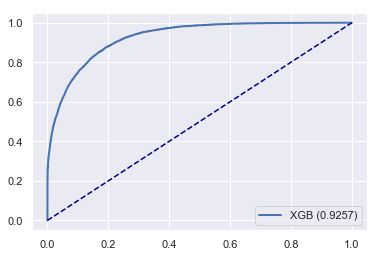

0.9257465529502421

In [18]:
print("------ XGB...")
import xgboost as xgb
clf = xgb.XGBClassifier(n_estimators = 200)

clf, y_test_clf, y_prob_clf = validacion_cruzada(clf,X,y,skf)
curva_ROC(3,False,y_test_clf,y_prob_clf,'XGB')

Text(0,0.5,'característica')

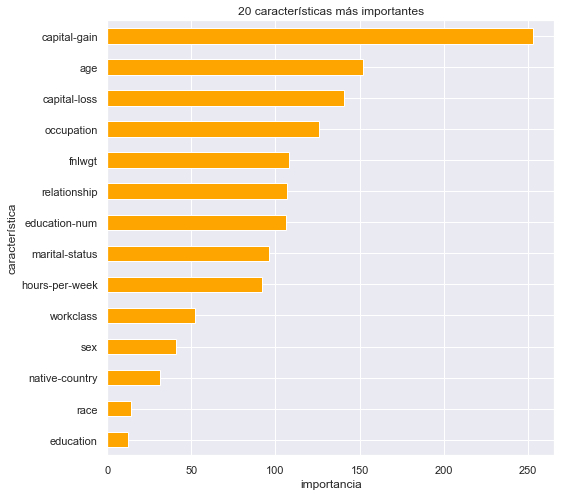

In [19]:
'''
Visualizar las características más importantes según la frecuencia con que se usan en los árboles de XGB (sobre el último modelo de la CV)
'''
plt.figure(4)
plt.clf()
features = list(adult)
mapFeat = dict(zip(["f"+str(i) for i in range(len(features))],features))
type(clf.get_booster().get_fscore())
ts = pd.Series(clf.get_booster().get_fscore())
ts.index = ts.reset_index()['index'].map(mapFeat)
ax2=ts.sort_values()[-20:].plot(kind="barh", figsize = (8,8), title=("20 características más importantes"), color='orange')
ax2.set_xlabel("importancia")
ax2.set_ylabel("característica")


